# The relationship and prediction between Pokemon's stats and generation

Author: Mingyan Xu

Course Project, UC Irvine, Math 10, F22

## Introduction

Introduce your project here.  Maybe 3 sentences.

From other's project in the past quarter, I found that there were some analysis about Pokemon, which was one of my favorite games, so I chose to explore more about this dataset. The main topic I choose is to find the relationship between the generations and the each stats for pokemons, and study whether the strength of Pokemon has become stronger through generations. In addition, I will try to predict the trend on designing new generation pokemon, such as their type and stats.

## Import Section

In [ ]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Feature Engineering

This dataset contains the general information of 800 different pokemons, including their names, types, HP, attack, defense and other stats.

In [ ]:
df = pd.read_csv("Pokemon.csv")
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


I think I'm going to use the pokemons that have two types to avoid the error porvided by types. 
Use dropna() method to drop the nan value in the whole dataset.

In [ ]:
df = df.dropna()

I plan to use non-legendary pokemon for this project because the legendary pokemons are designed to have higher stats compared to the regular pokemons.

In [ ]:
df = df[df["Legendary"]==False]
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,711,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,6,False
786,711,GourgeistLarge Size,Ghost,Grass,494,75,95,122,58,75,69,6,False
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False


I don't need the "Legendary" column anymore, so I just drop it.

In [ ]:
df = df.drop("Legendary",axis=1)

The original column names are not working when doing the altair chart, so I change  the name for speical attack and defense.

In [ ]:
df = df.rename(columns={"Sp. Atk":"SpecialA","Sp. Def": "SpecialD"})

In [ ]:
df.shape

(374, 12)

## Analysis of the dataset

To focus on the generation, first check the number of pokemons in each generations.

In [ ]:
df["Generation"].value_counts()

1    74
3    74
5    69
4    61
2    53
6    43
Name: Generation, dtype: int64

Use groupby method to see more detailed information.

In [ ]:
df.groupby("Generation").apply(display)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,SpecialA,SpecialD,Speed,Generation
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...
151,140,Kabuto,Rock,Water,355,30,80,90,55,45,55,1
152,141,Kabutops,Rock,Water,495,60,115,105,65,70,80,1
153,142,Aerodactyl,Rock,Flying,515,80,105,65,60,75,130,1
154,142,AerodactylMega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,SpecialA,SpecialD,Speed,Generation
177,163,Hoothoot,Normal,Flying,262,60,30,30,36,56,50,2
178,164,Noctowl,Normal,Flying,442,100,50,50,76,96,70,2
179,165,Ledyba,Bug,Flying,265,40,20,30,40,80,55,2
180,166,Ledian,Bug,Flying,390,55,35,50,55,110,85,2
181,167,Spinarak,Bug,Poison,250,40,60,40,40,40,30,2
182,168,Ariados,Bug,Poison,390,70,90,70,60,60,40,2
183,169,Crobat,Poison,Flying,535,85,90,80,70,80,130,2
184,170,Chinchou,Water,Electric,330,75,38,38,56,56,67,2
185,171,Lanturn,Water,Electric,460,125,58,58,76,76,67,2
188,174,Igglybuff,Normal,Fairy,210,90,30,15,40,20,15,2


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,SpecialA,SpecialD,Speed,Generation
275,254,SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3
277,256,Combusken,Fire,Fighting,405,60,85,60,85,60,55,3
278,257,Blaziken,Fire,Fighting,530,80,120,70,110,70,80,3
279,257,BlazikenMega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3
281,259,Marshtomp,Water,Ground,405,70,85,70,60,70,50,3
...,...,...,...,...,...,...,...,...,...,...,...,...
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3
410,374,Beldum,Steel,Psychic,300,40,55,80,35,60,30,3
411,375,Metang,Steel,Psychic,420,60,75,100,55,80,50,3
412,376,Metagross,Steel,Psychic,600,80,135,130,95,90,70,3


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,SpecialA,SpecialD,Speed,Generation
434,389,Torterra,Grass,Ground,525,95,109,105,75,85,56,4
436,391,Monferno,Fire,Fighting,405,64,78,52,78,52,81,4
437,392,Infernape,Fire,Fighting,534,76,104,71,104,71,108,4
440,395,Empoleon,Water,Steel,530,84,86,88,111,101,60,4
441,396,Starly,Normal,Flying,245,40,55,30,30,30,60,4
...,...,...,...,...,...,...,...,...,...,...,...,...
532,479,RotomHeat Rotom,Electric,Fire,520,50,65,107,105,107,86,4
533,479,RotomWash Rotom,Electric,Water,520,50,65,107,105,107,86,4
534,479,RotomFrost Rotom,Electric,Ice,520,50,65,107,105,107,86,4
535,479,RotomFan Rotom,Electric,Flying,520,50,65,107,105,107,86,4


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,SpecialA,SpecialD,Speed,Generation
558,499,Pignite,Fire,Fighting,418,90,93,55,70,55,55,5
559,500,Emboar,Fire,Fighting,528,110,123,65,100,65,65,5
578,519,Pidove,Normal,Flying,264,50,55,50,36,30,43,5
579,520,Tranquill,Normal,Flying,358,62,77,62,50,42,65,5
580,521,Unfezant,Normal,Flying,488,80,115,80,65,55,93,5
...,...,...,...,...,...,...,...,...,...,...,...,...
713,647,KeldeoOrdinary Forme,Water,Fighting,580,91,72,90,129,90,108,5
714,647,KeldeoResolute Forme,Water,Fighting,580,91,72,90,129,90,108,5
715,648,MeloettaAria Forme,Normal,Psychic,600,100,77,77,128,128,90,5
716,648,MeloettaPirouette Forme,Normal,Fighting,600,100,128,90,77,77,128,5


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,SpecialA,SpecialD,Speed,Generation
720,652,Chesnaught,Grass,Fighting,530,88,107,122,74,75,64,6
723,655,Delphox,Fire,Psychic,534,75,69,72,114,100,104,6
726,658,Greninja,Water,Dark,530,72,95,67,103,71,122,6
728,660,Diggersby,Normal,Ground,423,85,56,77,50,77,78,6
729,661,Fletchling,Normal,Flying,278,45,50,43,40,38,62,6
730,662,Fletchinder,Fire,Flying,382,62,73,55,56,52,84,6
731,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6
734,666,Vivillon,Bug,Flying,411,80,52,50,90,50,89,6
735,667,Litleo,Fire,Normal,369,62,50,58,73,54,72,6
736,668,Pyroar,Fire,Normal,507,86,68,72,109,66,106,6


""


Divide the original dataset into 6 based on generations.

In [ ]:
grouped = df.groupby("Generation")
list=[]

for gen, group in grouped:
    list.append(group)

## Data Visualization

First visualizing the number of pokemons in each generation and find that the first generation has the most and the sixth generation has the least.

In [ ]:
alt.Chart(df).mark_bar(size=15).encode(
    x=alt.X("Generation"),
    y="count()",
    color="Generation:N"
)

alt.Chart(...)

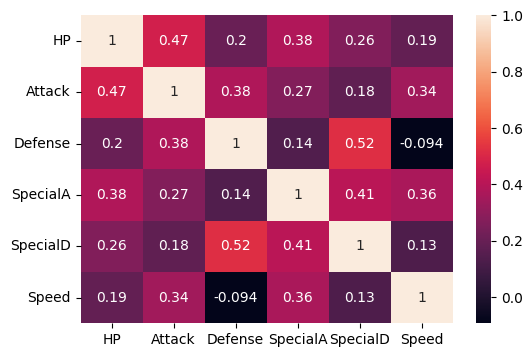

In [ ]:
plt.figure(figsize=(6,4))
corr=df.iloc[:,5:11].corr().round(3)
sns.heatmap(corr,annot=True)
sns.set(font_scale=1.0)
sns.set_style("whitegrid")

In [ ]:
alt.Chart(df).mark_circle().encode(
    x=alt.X("SpecialA",scale=alt.Scale(domain=[0, 250])),
    y=alt.Y("Attack",scale=alt.Scale(domain=[0, 240])),
    color="Generation:N",
    tooltip=["Name","Attack","SpecialA"]
).properties(
    title="Attack v.s. Special Attack based on generation"
)

alt.Chart(...)

In [ ]:
alt.Chart(df).mark_circle().encode(
    x=alt.X("SpecialD",scale=alt.Scale(domain=[0, 250])),
    y=alt.Y("Defense",scale=alt.Scale(domain=[0, 240])),
    color="Generation:N",
    tooltip=["Name","Defense","SpecialD"]
).properties(
    title="Defense v.s. Special Defense based on generation"
)

alt.Chart(...)

From the chart above, we can find that the general shape and trend for each generation are similar. 
I find that the distribution is not similar to what I believe before. I think a pokemon should have whether a high attack or high special attack, but the graph shows that most of the pokemon have the same attack and special attack. Also the same observation for the defense and special defense.

## K-Mean clusters

Use the stats value to predict clusters. I choose 6 because there are total 6 generations in the dataset.

In [ ]:
kmeans = KMeans(n_clusters=6)

Use all the stats value in the dataset to predict the cluster.

In [ ]:
first_col = "Total"
last_col = "Speed"

In [ ]:
kmeans.fit(df[[first_col,last_col]])

KMeans(n_clusters=6)

In [ ]:
arr = kmeans.predict(df[[first_col,last_col]])

In [ ]:
df["cluster"]= arr

In [ ]:
alt.Chart(df).mark_circle().encode(
    x="Attack",
    y="SpecialA",
    color="cluster:N",
    tooltip=["#","Name","Attack","SpecialA"]
).facet(
    row="Generation"
)

alt.FacetChart(...)

The charts show that the predicting cluster is roughly and evenly distributed in each generation, so we can get a conclusion that Pokemon's stats strength are not clearly related to generation.
Therefore, we can say that The number of Pokemons of similar strength is about the same in each generation based on the result from K-means cluster.

## Machine Learning - Linear Regression

For the machine learning part, I first choose to use the linear regression model to predict the generation based on the known data. 

In [ ]:
features = ["Total","HP","Attack","SpecialA","Defense","SpecialD","Speed"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[features],df["Generation"],train_size=0.7)

In [ ]:
lin = LinearRegression()

In [ ]:
lin.fit(X_train,y_train)

LinearRegression()

In [ ]:
linear_train_accuracy = lin.score(X_train,y_train)

In [ ]:
linear_test_accuracy = lin.score(X_test,y_test)

In [ ]:
print(f"When using the linear regression model,\nthe accuracy for the training set is {linear_train_accuracy},\nand the accuracy for the test set is {linear_test_accuracy}.")

When using the linear regression model,
the accuracy for the training set is 0.01990876569568578,
and the accuracy for the test set is -0.061714437432493385.


By using the score method, I calculate the accuracy for both train and test data, but the accuracies are very low compared with the dataset we used in class, which means that my dataset doesn't perform well under the linear regression model.

## Machine Learning - Logistic Regression

Then, I try to use the logistic regression model to check if the generation can be predicted using pokemon's stats. 
For this model, I also include the calculation of the mean squared error to see the accuracy.

In [ ]:
lgr = LogisticRegression(max_iter=500)

In [ ]:
lgr.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [ ]:
log_test_accuracy = lgr.score(X_test, y_test)

In [ ]:
log_train_accuracy = lgr.score(X_train, y_train)

In [ ]:
log_train_error = mean_squared_error(y_train,lgr.predict(X_train))
log_test_error = mean_squared_error(y_test,lgr.predict(X_test))

In [ ]:
print(f"The mean squared  error for the training set is {log_train_error},\n  and the mean squared error for the test set is {log_test_error}.\nThe accuracy for the training set is {log_train_accuracy},\n  and the accuracy for the test set is {log_test_accuracy}.")

The mean squared  error for the training set is 3.888888888888889,
  and the mean squared error for the test set is 4.699115044247788.
The accuracy for the training set is 0.26053639846743293,
  and the accuracy for the test set is 0.21238938053097345.


I get the similar result as the linear regression model, even a little bit less accurate because my accuracy is lower and error is relatively high. 

#### It is clear that the generation can't be predicted by the stats from three above regression model, so I changed my goal to using attack to predict the special attack for each pokemon for the following regression.


## Machine Learning - Decision Tree Regressor
Since my expectation is to predict the generation, using tree regressor instead of classifier is better.

In [ ]:
alt.Chart(df).mark_line().encode(
    x="Attack",
    y="SpecialA"
)

alt.Chart(...)

There are too many peak in the dataset, maybe it's hard to predict.
I choose the generation 2, which consists of the most pokemons, and try to predict the stat of speical attacks.

In [ ]:
df1 = list[1]

In [ ]:
reg = DecisionTreeRegressor(max_leaf_nodes=10,max_depth=10)

In [ ]:
reg.fit(df1[["Attack"]],df1["SpecialA"])

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=10)

In [ ]:
df1["PredictA"] = reg.predict(df1[["Attack"]])

In [ ]:
d1 = alt.Chart(df1).mark_line().encode(
    x="Attack",
    y="SpecialA"
)

d2 = alt.Chart(df1).mark_line(color="red").encode(
    x="Attack",
    y="PredictA"
)
d1+d2

alt.LayerChart(...)

The graph shows that the prection is kind of accurate, but there is a big peak in the middle of the data which is hard to predect.

## Machine Learning - Random Forest Regressor

Finally, try to use random forest regressor to predict pokemons in generation 6, which has the least pokemons.

In [ ]:
df2 = list[5]

In [ ]:
features2 = ["Total","HP","Attack","Defense","SpecialD","Speed"]

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df2[features2],df2["SpecialA"],train_size=0.6,random_state=32203564)

In [ ]:
rfe = RandomForestRegressor(n_estimators=100, max_leaf_nodes=15)

In [ ]:
rfe.fit(X_train1,y_train1)

RandomForestRegressor(max_leaf_nodes=15)

In [ ]:
rfe.score(X_train1,y_train1)

0.8756082391535686

In [ ]:
rfe.score(X_test1,y_test1)

0.41566882658863746

### Graphing for the Random Forest Regressor

In [ ]:
rfe.fit(df2[["Attack"]],df2["SpecialA"])

RandomForestRegressor(max_leaf_nodes=15)

In [ ]:
df2["PredictA"] = rfe.predict(df2[["Attack"]])

In [ ]:
d1 = alt.Chart(df2).mark_line().encode(
    x="Attack",
    y="SpecialA"
)

d2 = alt.Chart(df2).mark_line(color="red").encode(
    x="Attack",
    y="PredictA"
)
d1+d2

alt.LayerChart(...)

## Summary

Either summarize what you did, or summarize the results.  Maybe 3 sentences.

I try to use different methods, including K-Mean clusters,logistics regression and linear regression, to analysis the relationship between generations and the stats of pokemons, but none of them performed very well to fit the data. Also, it is hard to do the prediction for future generation pokemons based on the stats becasue the relationship is not strong enough. 
After failing to predict the generation, I try to predict the special attack values based on attack values using dicision tree regressor and random forest regressor, and find that the special attack values can be predected by the attack values with small error and high accuracy.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?
My dataset is from Kaggle. [Pokemon](https://www.kaggle.com/datasets/abcsds/pokemon)

* List any other references that you found helpful.
[Tutorial for Pokemon](https://www.kaggle.com/code/christinobarbosa/machinelearningmodel-pokemon/notebook)
[Pinting and forming new dataframe based on a groupby object](https://stackoverflow.com/questions/22691010/how-to-print-a-groupby-object)
[Difference between Dicision Tree Regressor and Classifier](https://becominghuman.ai/machine-learning-series-day-6-decision-tree-regressor-82a2e2f873a
)

## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fca2004f-f018-44a1-a4e9-b6932f2fd646' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>